In [1]:
# to auto reload the modified module
% load_ext autoreload
% autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from utils import *
from data import MnistTF
from models import *

/home/deep3072/anaconda2/envs/tu36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
# session settings
session = create_session(gpu_id='0')
# seed settings
set_rand_seed(0)

In [4]:
try_reg2 = False
if try_reg2:
#         X_data = np.random.random((6000))[:, np.newaxis]*100
#         noise = np.random.normal(0, 0.05, X_data.shape).astype(np.float32)*0
#         y_data = X_data*2 + 1 + noise
    X_data = np.linspace(-10,10,5000, dtype=np.float32)[:, np.newaxis]
    np.random.shuffle(X_data)
    noise = np.random.normal(0, 10, X_data.shape).astype(np.float32)
    y_data = np.square(X_data) - 0.5 + noise
    print('X_data',X_data.shape,'\n',X_data[:5])
    print('y_data',y_data.shape,'\n',y_data[:5])
    
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
    
    input_dims = X_train.shape[1]
    col_0 = SoftenedNN(
        input_dims=input_dims
        , output_dims=1
        , session=session
        , dtype_X=tf.float32, dtype_y=tf.float32
    )
    col_0.add_layer(
        FC(inputs=col_0.h[-1],out_dims=256,activation_fn=tf.nn.relu)
    )
    col_0.add_layer(
        FC(inputs=col_0.h[-1],out_dims=1,activation_fn=None)
    )
    col_0.compile_nn(
#         loss=tf.reduce_mean(tf.reduce_sum(tf.square(col_0.ys - col_0.prediction),reduction_indices=[1]))
        loss=tf.losses.mean_squared_error(col_0.ys,col_0.prediction)
        ,opt=tf.train.AdamOptimizer(learning_rate=1e-3)
#         ,opt=tf.train.GradientDescentOptimizer(learning_rate=1e-1)
#         ,mectrics=[]
    )
    col_0.train(
        X=X_train
        , y=y_train
#         , val_set=[X_val,y_val]
        , batch_size=32
        , n_epochs=200
        , display_steps=100
    )

In [5]:
if try_reg2:
    col_0.plt_loss()
    col_0.plt_metrics()
    test_metric = col_0.get_metrics(X_test, y_test)
    print(test_metric)

In [6]:
try_cls2 = True
if try_cls2:
    mnist = MnistTF()
    X_train, y_train = mnist.get_train_data()
    X_val, y_val = mnist.get_validation_data()
    X_test, y_test = mnist.get_test_data()
    print_obj(X_train, 'X_train')
    print_obj(y_train, 'y_train')
    input_dims = X_train.shape[1]
    output_dims = y_train.shape[1]
    print_obj(input_dims, 'input_dims')
    print_obj(output_dims, 'output_dims')


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
X_train <class 'numpy.ndarray'> (55000, 784)
y_train <class 'numpy.ndarray'> (55000, 10)
input_dims <class 'int'> 784
output_dims <class 'int'> 10


In [7]:
if try_cls2:
    teacher = build_big_model(input_dims, output_dims, session)
    teacher.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=32
        ,n_epochs=5
        ,display_steps=100)

Epoch 1 , step 0 , loss= 2.1537776 val_loss= 2.27826 , acc = 0.09375 val acc = 0.1272 
Epoch 1 , step 100 , loss= 0.80246747 val_loss= 0.6238871 , acc = 0.71875 val acc = 0.8382 
Epoch 1 , step 200 , loss= 0.416744 val_loss= 0.40995783 , acc = 0.875 val acc = 0.8914 
Epoch 1 , step 300 , loss= 0.42214334 val_loss= 0.35452422 , acc = 0.84375 val acc = 0.9002 
Epoch 1 , step 400 , loss= 0.099252924 val_loss= 0.32509032 , acc = 1.0 val acc = 0.9096 
Epoch 1 , step 500 , loss= 0.26806623 val_loss= 0.2937818 , acc = 0.90625 val acc = 0.9124 
Epoch 1 , step 600 , loss= 0.12835047 val_loss= 0.28090465 , acc = 1.0 val acc = 0.9222 
Epoch 1 , step 700 , loss= 0.2505793 val_loss= 0.26762897 , acc = 0.96875 val acc = 0.9208 
Epoch 1 , step 800 , loss= 0.28472674 val_loss= 0.24726787 , acc = 0.9375 val acc = 0.9302 
Epoch 1 , step 900 , loss= 0.4780286 val_loss= 0.2440239 , acc = 0.875 val acc = 0.9316 
Epoch 1 , step 1000 , loss= 0.12109499 val_loss= 0.2226496 , acc = 1.0 val acc = 0.9378 
Epoch 

Plotting loss...


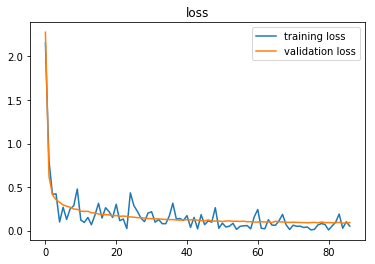

Plotting metrics...


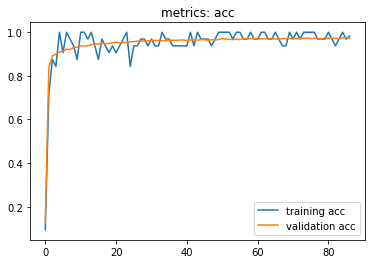

{'acc': 0.9694}


In [8]:
if try_cls2:
    teacher.plt_loss()
    teacher.plt_metrics()
    test_metric = teacher.get_metrics(X_test, y_test)
    print(test_metric)

In [21]:
if try_cls2:
    temperature = 2
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)

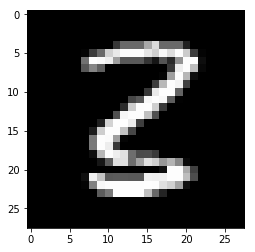

sample.max() 1.0
label [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
teacher.predict [[0.1316 0.0987 0.087  0.13   0.0419 0.0873 0.1999 0.0898 0.0436 0.0902]]
teacher.predict_softened [[0.1175 0.1017 0.0955 0.1168 0.0663 0.0957 0.1448 0.097  0.0676 0.0972]]
y_soft [0.1175 0.1017 0.0955 0.1168 0.0663 0.0957 0.1448 0.097  0.0676 0.0972]


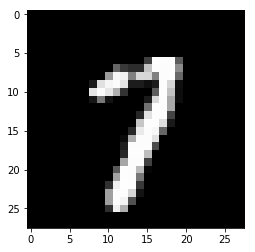

sample.max() 1.0
label [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
teacher.predict [[0.0917 0.1411 0.1144 0.1409 0.0239 0.0513 0.1471 0.1343 0.0412 0.1142]]
teacher.predict_softened [[0.0989 0.1226 0.1104 0.1225 0.0504 0.0739 0.1252 0.1196 0.0662 0.1103]]
y_soft [0.0989 0.1226 0.1104 0.1225 0.0504 0.0739 0.1252 0.1196 0.0662 0.1103]


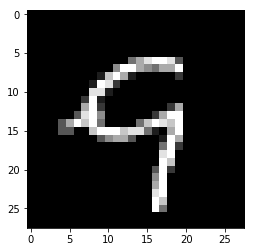

sample.max() 1.0
label [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
teacher.predict [[0.0849 0.171  0.1238 0.1007 0.0464 0.0873 0.107  0.1036 0.0422 0.1329]]
teacher.predict_softened [[0.0939 0.1332 0.1134 0.1022 0.0694 0.0952 0.1054 0.1037 0.0662 0.1174]]
y_soft [0.0939 0.1332 0.1134 0.1022 0.0694 0.0952 0.1054 0.1037 0.0662 0.1174]


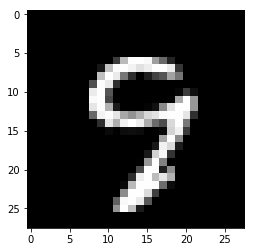

sample.max() 1.0
label [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
teacher.predict [[0.1215 0.1327 0.1635 0.083  0.0623 0.0525 0.138  0.1133 0.0566 0.0766]]
teacher.predict_softened [[0.1122 0.1172 0.1302 0.0927 0.0804 0.0737 0.1196 0.1083 0.0766 0.0891]]
y_soft [0.1122 0.1172 0.1302 0.0927 0.0804 0.0737 0.1196 0.1083 0.0766 0.0891]


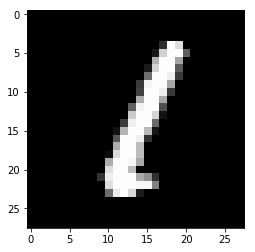

sample.max() 1.0
label [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
teacher.predict [[0.0721 0.1159 0.0807 0.2177 0.0212 0.0515 0.1413 0.1281 0.0684 0.1031]]
teacher.predict_softened [[0.0881 0.1117 0.0932 0.1531 0.0477 0.0745 0.1233 0.1174 0.0858 0.1053]]
y_soft [0.0881 0.1117 0.0932 0.1531 0.0477 0.0745 0.1233 0.1174 0.0858 0.1053]


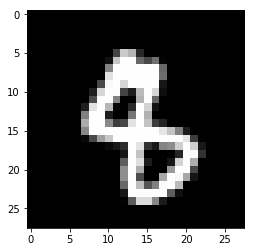

sample.max() 1.0
label [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
teacher.predict [[0.1184 0.1836 0.1118 0.0861 0.0543 0.0644 0.1339 0.0996 0.0246 0.1235]]
teacher.predict_softened [[0.1118 0.1393 0.1087 0.0953 0.0758 0.0825 0.1189 0.1026 0.0509 0.1142]]
y_soft [0.1118 0.1393 0.1087 0.0953 0.0758 0.0825 0.1189 0.1026 0.0509 0.1142]


In [22]:
# plot and show sample
if try_cls2 and True:
    n_samples = 6
    round_show = 4
    X_show = X_train
    n_data = X_show.shape[0]
    indices = np.random.choice(n_data,n_samples)
    for i in range(n_samples):
        sample = X_show[[indices[i]]]
        label = y_train[indices[i]]
        plt.imshow(sample.reshape((28,28)), cmap='gray')
        plt.show()
        pred = teacher.predict(sample)
        pred_t = teacher.predict_softened(sample, temperature=temperature)
        pred_t2 = y_train_soft[indices[i]]
        print('sample.max()',sample.max())
        print('label',label)
        print('teacher.predict',np.round(pred,round_show))
        print('teacher.predict_softened',np.round(pred_t,round_show))
        print('y_soft',np.round(pred_t2,round_show))
        #     teacher.predict()

In [ ]:
if try_cls2:
    small = build_small_model(input_dims, output_dims, session, is_student=False)
    small.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=32
        ,n_epochs=10
        ,display_steps=100)

Epoch 1 , step 0 , loss= 2.29521 val_loss= 2.2979586 , acc = 0.1875 val acc = 0.1084 
Epoch 1 , step 100 , loss= 1.9911478 val_loss= 1.8120631 , acc = 0.34375 val acc = 0.4462 
Epoch 1 , step 200 , loss= 1.2272611 val_loss= 1.3304373 , acc = 0.78125 val acc = 0.5844 
Epoch 1 , step 300 , loss= 1.0747912 val_loss= 1.0591612 , acc = 0.6875 val acc = 0.6672 
Epoch 1 , step 400 , loss= 0.8291235 val_loss= 0.9102884 , acc = 0.71875 val acc = 0.717 
Epoch 1 , step 500 , loss= 1.0041931 val_loss= 0.8116733 , acc = 0.625 val acc = 0.7544 
Epoch 1 , step 600 , loss= 1.0101886 val_loss= 0.7389965 , acc = 0.65625 val acc = 0.7702 
Epoch 1 , step 700 , loss= 0.65773845 val_loss= 0.6893746 , acc = 0.75 val acc = 0.7996 
Epoch 1 , step 800 , loss= 0.7401259 val_loss= 0.65188676 , acc = 0.75 val acc = 0.8 
Epoch 1 , step 900 , loss= 0.59829205 

Plotting loss...


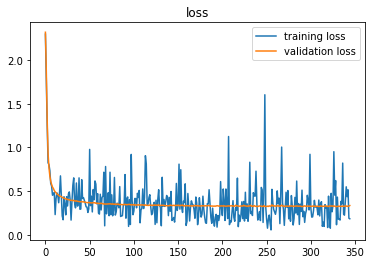

Plotting metrics...


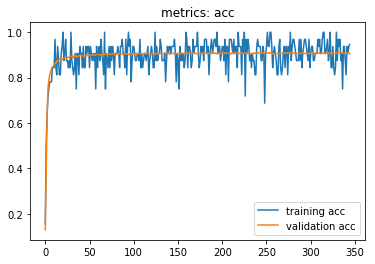

{'acc': 0.9027}


In [12]:
if try_cls2:
    small.plt_loss()
    small.plt_metrics()
    test_metric = small.get_metrics(X_test, y_test)
    print(test_metric)

In [19]:
if try_cls2:
    X_train = X_train
    y_train = y_train
    y_train_soft = y_train_soft
    student = build_small_model(input_dims, output_dims, session, is_student=True)
    student.soft_train(
        X=X_train
        ,y=y_train
        ,y_soft=y_train_soft
        ,temperature=temperature
        ,coef_softloss=1
        ,val_set=[X_val,y_val,y_val_soft]
        ,batch_size=32
        ,n_epochs=10
        ,display_steps=100)
    # try original student, y_train_soft is ok
#     student = build_small_model(input_dims, output_dims, session, soften=False)
#     student.train(
#         X=X_train
#         ,y=y_train_soft
#         ,val_set=[X_val,y_val]
#         ,batch_size=32
#         ,n_epochs=2000
#         ,display_steps=100)

Epoch 1 , step 0 , loss= 232.54355 val_loss= 232.57803 , acc = 0.125 val acc = 0.0842 
Epoch 1 , step 100 , loss= 232.04895 val_loss= 232.24004 , acc = 0.40625 val acc = 0.2602 
Epoch 1 , step 200 , loss= 231.955 val_loss= 232.01476 , acc = 0.71875 val acc = 0.5026 
Epoch 1 , step 300 , loss= 231.98071 val_loss= 231.90657 , acc = 0.53125 val acc = 0.557 
Epoch 1 , step 400 , loss= 231.73946 val_loss= 231.84642 , acc = 0.71875 val acc = 0.619 
Epoch 1 , step 500 , loss= 231.80116 val_loss= 231.80894 , acc = 0.6875 val acc = 0.6608 
Epoch 1 , step 600 , loss= 231.8123 val_loss= 231.78523 , acc = 0.65625 val acc = 0.7448 
Epoch 1 , step 700 , loss= 231.81914 val_loss= 231.76715 , acc = 0.71875 val acc = 0.7454 
Epoch 1 , step 800 , loss= 231.75772 val_loss= 231.74934 , acc = 0.84375 val acc = 0.794 
Epoch 1 , step 900 , loss= 231.78525 val_loss= 231.73628 , acc = 0.71875 val acc = 0.8086 
Epoch 1 , step 1000 , loss= 231.72702 val_loss= 231.7244 , acc = 0.78125 val acc = 0.8072 
Epoch 1 , 

Epoch 6 , step 510 , loss= 231.50766 val_loss= 231.63239 , acc = 0.96875 val acc = 0.843 
Epoch 6 , step 610 , loss= 231.68585 val_loss= 231.6338 , acc = 0.8125 val acc = 0.8432 
Epoch 6 , step 710 , loss= 231.71579 val_loss= 231.63522 , acc = 0.8125 val acc = 0.8426 
Epoch 6 , step 810 , loss= 231.60849 val_loss= 231.63506 , acc = 0.8125 val acc = 0.8328 
Epoch 6 , step 910 , loss= 231.61606 val_loss= 231.63551 , acc = 0.84375 val acc = 0.8424 
Epoch 6 , step 1010 , loss= 231.67712 val_loss= 231.63412 , acc = 0.71875 val acc = 0.8466 
Epoch 6 , step 1110 , loss= 231.67108 val_loss= 231.63805 , acc = 0.84375 val acc = 0.8344 
Epoch 6 , step 1210 , loss= 231.6143 val_loss= 231.63377 , acc = 0.8125 val acc = 0.844 
Epoch 6 , step 1310 , loss= 231.73354 val_loss= 231.63422 , acc = 0.8125 val acc = 0.846 
Epoch 6 , step 1410 , loss= 231.60812 val_loss= 231.63547 , acc = 0.875 val acc = 0.8442 
Epoch 6 , step 1510 , loss= 231.67708 val_loss= 231.63628 , acc = 0.84375 val acc = 0.8306 
Epoch

Plotting loss...


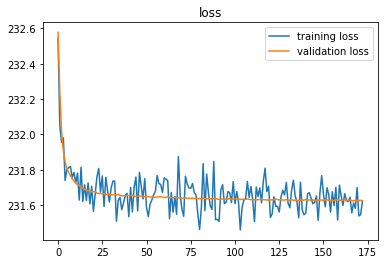

Plotting metrics...


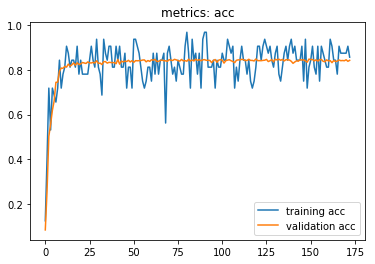

{'acc': 0.8407}


In [20]:
if try_cls2:
    student.plt_loss()
    student.plt_metrics()
    test_metric = student.get_metrics(X_test, y_test)
    print(test_metric)

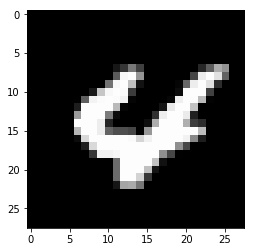

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[4.300e-03 0.000e+00 3.000e-04 0.000e+00 9.502e-01 8.000e-04 2.370e-02
  1.000e-04 5.900e-03 1.480e-02]]


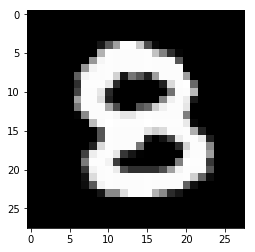

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[[0.000e+00 0.000e+00 4.600e-03 6.000e-04 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 9.948e-01 0.000e+00]]
[[1.560e-02 4.000e-04 1.282e-01 6.450e-02 1.000e-04 1.330e-02 3.600e-03
  5.000e-04 7.686e-01 5.300e-03]]


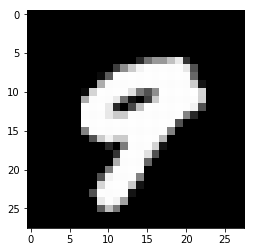

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[[0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.870e-02 0.000e+00 0.000e+00
  0.000e+00 2.000e-04 9.811e-01]]
[[1.200e-03 1.000e-04 5.000e-04 7.000e-04 1.966e-01 1.600e-03 2.000e-04
  2.060e-02 4.270e-02 7.357e-01]]


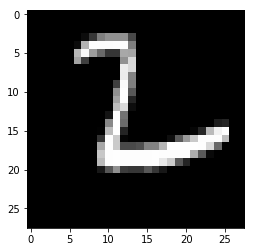

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[[1.100e-03 0.000e+00 9.651e-01 0.000e+00 0.000e+00 0.000e+00 3.360e-02
  0.000e+00 1.000e-04 0.000e+00]]
[[6.790e-02 9.900e-03 6.419e-01 2.260e-02 1.000e-03 1.350e-02 2.097e-01
  1.800e-03 3.110e-02 5.000e-04]]


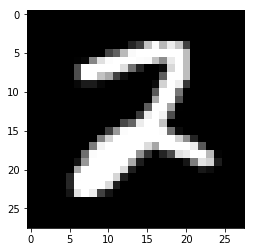

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[[0.000e+00 0.000e+00 9.999e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e-04 0.000e+00]]
[[3.100e-03 1.310e-02 9.085e-01 2.550e-02 0.000e+00 3.000e-04 2.300e-03
  8.100e-03 3.860e-02 3.000e-04]]


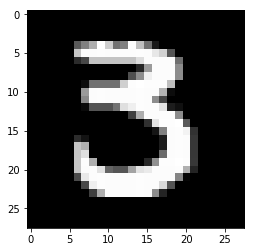

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[[0.000e+00 0.000e+00 0.000e+00 9.995e-01 0.000e+00 4.000e-04 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]]
[[2.030e-02 5.000e-04 1.970e-02 8.839e-01 0.000e+00 6.660e-02 2.000e-04
  2.600e-03 5.300e-03 9.000e-04]]


In [15]:
# plot and show sample
if try_cls2 and True:
    n_samples = 6
    round_show = 4
    n_data = X_test.shape[0]
    indices = np.random.choice(n_data,n_samples)
    for i in range(n_samples):
        sample = X_test[[indices[i]]]
        label = y_test[indices[i]]
        plt.imshow(sample.reshape((28,28)), cmap='gray')
        plt.show()
        pred = student.predict(sample)
        pred_t = student.predict_softened(sample, temperature=temperature)
        print(label)
        print(np.round(pred,round_show))
        print(np.round(pred_t,round_show))
#         print(np.round(pred_t2,round_show))
        #     student.predict()

In [16]:
# close_session(session)